# 参考文献
《数据分析师挣多少钱？“黑”了招聘网站告诉你！》网址：https://zhuanlan.zhihu.com/p/25704059

In [1]:
# -*- coding:utf-8 -*-\n
import pandas
import jieba
import matplotlib
from matplotlib import pyplot
from wordcloud import WordCloud, STOPWORDS
import numpy

# pyplot.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号\n",
# 有中文出现的情况，需要u'内容'

import sys
stdo = sys.stdout
reload(sys)
sys.setdefaultencoding('utf8')
sys.stdout= stdo

# 在python 下面一个包含中文字符串的列表（list）或字典，直接使用print会出现以下的结果：

# dict = {"asdf": "我们的python学习"}
# print dict
# {'asdf': '\\xe6\\x88\\x91\\xe4\\xbb\\xac\\xe7\\x9a\\x84python\\xe5\\xad\\xa6\\xe4\\xb9\\xa0'}
# 在输出处理好的数据结构的时候很不方便，需要使用以下方法进行输出：
# import json
# print json.dumps(dict, encoding=\"UTF-8\", ensure_ascii=False)

Building prefix dict from the default dictionary ...
Loading model from cache c:\users\leaf\appdata\local\temp\jieba.cache
Loading model cost 1.477 seconds.
Prefix dict has been built succesfully.


In [56]:
zhfont = matplotlib.font_manager.FontProperties(
    #fname = u"C:\\Anaconda2\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\msyh.ttc",
    fname = u"D:\\Projects\\Spider\\msyh.ttc",
    size = 24)

In [3]:
df = pandas.read_csv('crawler-data-807367-20171108python.csv')
print df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 12 columns):
爬取时间(__time)            1405 non-null object
爬取链接(__url)             1405 non-null object
职位(positionName)        1404 non-null object
公司状况(company)           1405 non-null object
发布时间(publish_time)      1404 non-null float64
学历(education)           1404 non-null object
工作经验(JingYan)           1404 non-null object
工资范围(salary)            1404 non-null object
职位标签(position_label)    1368 non-null object
职位描述(destription)       1404 non-null object
工作地点(address)           1404 non-null object
Unnamed: 11             0 non-null float64
dtypes: float64(2), object(10)
memory usage: 131.8+ KB
None


,爬取时间(__time),爬取链接(__url),职位(positionName),公司状况(company),发布时间(publish_time),学历(education),工作经验(JingYan),工资范围(salary),职位标签(position_label),职位描述(destription),工作地点(address),Unnamed: 11
0,2017-11-07 17:37:31,https://www.lagou.com/jobs/1448499.html,C++/Php/Python/Nodejs开...,"{""field"":""数据服务,企业服务"",""scale"":""<p class=\""finan...",1.509961e+09,本科及以上 /,经验1-3年 /,12k-24k,Node.js,<p>工作职责：<br>1. 负责大数据方向产品化工作<br>2. 负责产品运营管理平台建设...,上海/杨浦区/长阳路/ 隆昌路619号城市概念创意园区/,NaN
1,2017-11-07 17:37:29,https://www.lagou.com/jobs/3455363.html,python开发工程师(数据挖...,"{""field"":""社交网络"",""scale"":""150-500人"",""homepage"":...",1.509961e+09,本科及以上 /,经验1-3年 /,15k-30k,Python/大数据/信息安全,<p>职位描述：</p><p>1、负责安全数据分析平台的设计与开发，包括数据采集与清洗、数据...,"北京/朝阳区/望京/ 阜通东大街1号望京Soho塔2,B座20层/",NaN
2,2017-11-07 17:37:27,https://www.lagou.com/jobs/3114010.html,python爬虫--金融科技,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/,NaN
3,2017-11-07 17:37:27,https://www.lagou.com/jobs/3118058.html,python爬虫--fintech方向,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/,NaN
4,2017-11-07 17:37:25,https://www.lagou.com/jobs/3071379.html,python爬虫工程师--人工智能,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/,NaN


## 数据清洗

In [4]:
# 清除不需要的字段
new_df = df.drop(['Unnamed: 11'], axis=1)

# 更改列名
new_df.columns = ['__time', '__url', 'positionName', 'company', 'publish_time', 'education', 'JingYan', 'salary', 'position_label', 'destription', 'address']

In [5]:
# 是否存在空值
new_df['salary'].isnull().value_counts()

False    1404
True        1
Name: salary, dtype: int64

In [6]:
# 删除薪资为空的行
new_df = new_df.drop(new_df[new_df.salary.isnull()].index)

In [7]:
print new_df.info()
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1404
Data columns (total 11 columns):
__time            1404 non-null object
__url             1404 non-null object
positionName      1404 non-null object
company           1404 non-null object
publish_time      1404 non-null float64
education         1404 non-null object
JingYan           1404 non-null object
salary            1404 non-null object
position_label    1368 non-null object
destription       1404 non-null object
address           1404 non-null object
dtypes: float64(1), object(10)
memory usage: 131.6+ KB
None


,__time,__url,positionName,company,publish_time,education,JingYan,salary,position_label,destription,address
0,2017-11-07 17:37:31,https://www.lagou.com/jobs/1448499.html,C++/Php/Python/Nodejs开...,"{""field"":""数据服务,企业服务"",""scale"":""<p class=\""finan...",1.509961e+09,本科及以上 /,经验1-3年 /,12k-24k,Node.js,<p>工作职责：<br>1. 负责大数据方向产品化工作<br>2. 负责产品运营管理平台建设...,上海/杨浦区/长阳路/ 隆昌路619号城市概念创意园区/
1,2017-11-07 17:37:29,https://www.lagou.com/jobs/3455363.html,python开发工程师(数据挖...,"{""field"":""社交网络"",""scale"":""150-500人"",""homepage"":...",1.509961e+09,本科及以上 /,经验1-3年 /,15k-30k,Python/大数据/信息安全,<p>职位描述：</p><p>1、负责安全数据分析平台的设计与开发，包括数据采集与清洗、数据...,"北京/朝阳区/望京/ 阜通东大街1号望京Soho塔2,B座20层/"
2,2017-11-07 17:37:27,https://www.lagou.com/jobs/3114010.html,python爬虫--金融科技,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/
3,2017-11-07 17:37:27,https://www.lagou.com/jobs/3118058.html,python爬虫--fintech方向,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/
4,2017-11-07 17:37:25,https://www.lagou.com/jobs/3071379.html,python爬虫工程师--人工智能,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/


## 地域分布

In [8]:
def city_split(full_address):
    try:
        #return full_address.split('/')[0].decode('utf-8')
        # print full_address.split('/')[0]
        city = full_address.split('/')[0]
    except:
        # print full_address
        city = full_address
    return city

In [9]:
new_df['city'] = new_df['address'].apply(city_split)

In [10]:
city_count = pandas.value_counts(new_df.city)

In [15]:
def auto_xtricks(rects, xticks):
    x = []
    for rect in rects:
        x.append(rect.get_x() + rect.get_width()/2)
    x = tuple(x)
    pyplot.xticks(x,xticks)
        
def auto_tag(rects):
    for rect in rects:
        height = rect.get_height()
        pyplot.text(rect.get_x() + rect.get_width()/4., 1.03*height, "%s" % float(height))

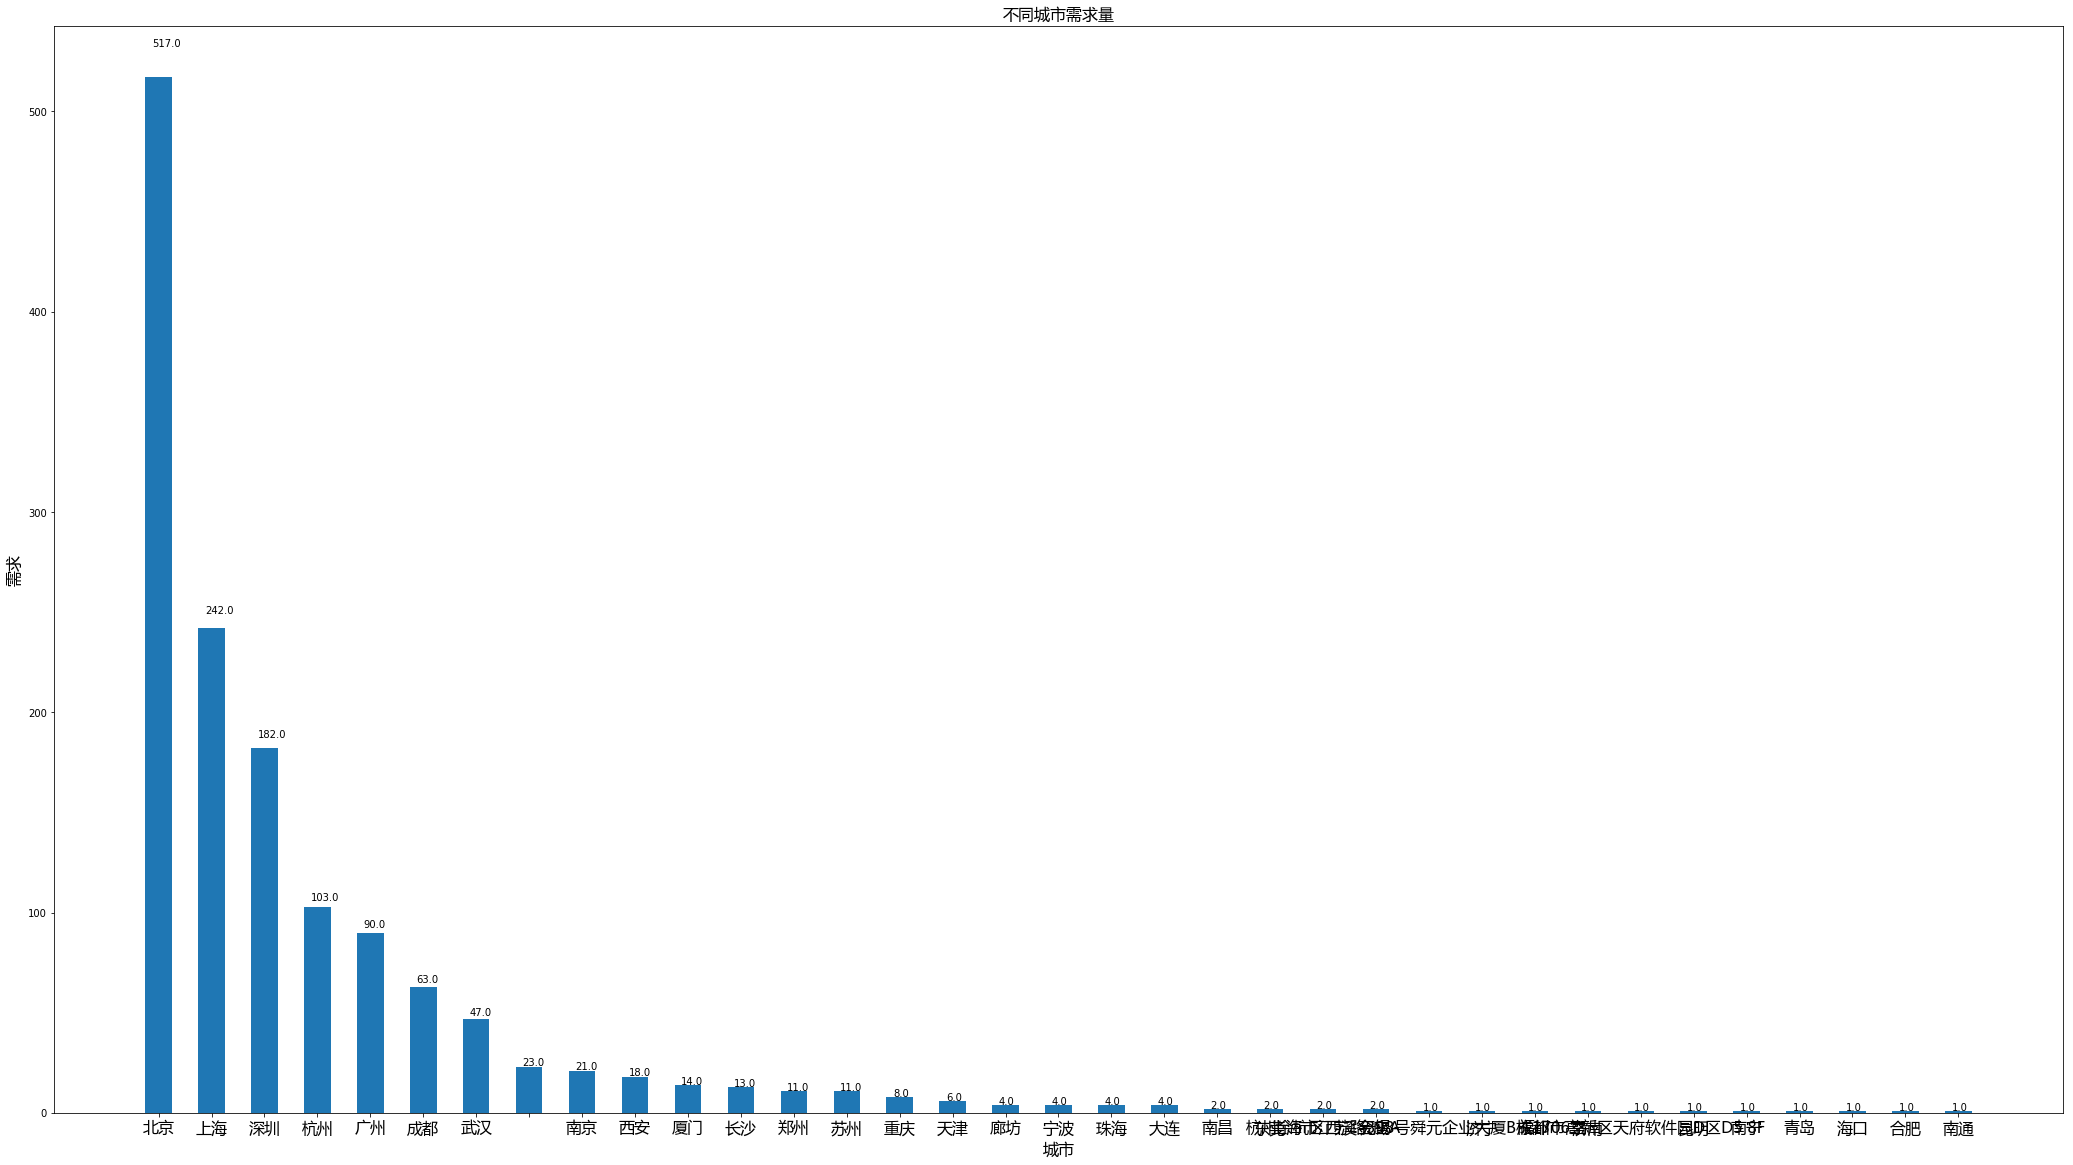

In [40]:
# 观察地域分布情况
fig = pyplot.figure(figsize=(36, 20))
ax1 = pyplot.subplot(111)
rect = ax1.bar(numpy.arange(len(city_count)),city_count.values, width = 0.5)

auto_xtricks(rect, city_count.index)
ax1.set_xticklabels(city_count.index,fontproperties = zhfont)

auto_tag(rect)
ax1.set_title(u'不同城市需求量', fontproperties = zhfont)

pyplot.xlabel(u"城市",fontproperties = zhfont)
pyplot.ylabel(u"需求",fontproperties = zhfont)

pyplot.savefig('city_count.png')
pyplot.show()

在拉勾网上，全国有34个城市的企业需求python人才，其中大多数需求产生于北京市。需求量排在前5的分别是：北京、上海、深圳、杭州、广州。需要大量使用python编程语言的职业大量集中在北上广深四大一线城市，以及杭州这个互联网和电子商务企业的聚集地。我国大量互联网企业在北京聚集，因而北京市占据了巨大的需求比重。

python人才的工作机会集中在北上广深以及杭州；另一个方面，这些城市也都集中了大量的各行业人才，机遇与挑战并存。

## 薪酬分布

In [22]:
# 是否存在空值
new_df['salary'].isnull().value_counts()

False    1404
Name: salary, dtype: int64

In [ ]:
# 删除薪资为空的行
new_df = new_df.drop(new_df[new_df.salary.isnull()].index)

In [27]:
def salary_split(salary):
    try:
        salary_list = salary.split('-')
        #print salary
        min_salary = float(int(salary_list[0][:-1]))
        return min_salary
    except:
        print salary
        salary_list = salary.split('k')
        #print salary
        min_salary = float(int(salary_list[0][:-1]))
        return min_salary

In [28]:
new_df['min_salary'] = new_df.salary.apply(salary_split)

In [29]:
print new_df.info()
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1404
Data columns (total 13 columns):
__time            1404 non-null object
__url             1404 non-null object
positionName      1404 non-null object
company           1404 non-null object
publish_time      1404 non-null float64
education         1404 non-null object
JingYan           1404 non-null object
salary            1404 non-null object
position_label    1368 non-null object
destription       1404 non-null object
address           1404 non-null object
city              1404 non-null object
min_salary        1404 non-null float64
dtypes: float64(2), object(11)
memory usage: 153.6+ KB
None


,__time,__url,positionName,company,publish_time,education,JingYan,salary,position_label,destription,address,city,min_salary
0,2017-11-07 17:37:31,https://www.lagou.com/jobs/1448499.html,C++/Php/Python/Nodejs开...,"{""field"":""数据服务,企业服务"",""scale"":""<p class=\""finan...",1.509961e+09,本科及以上 /,经验1-3年 /,12k-24k,Node.js,<p>工作职责：<br>1. 负责大数据方向产品化工作<br>2. 负责产品运营管理平台建设...,上海/杨浦区/长阳路/ 隆昌路619号城市概念创意园区/,上海,12.0
1,2017-11-07 17:37:29,https://www.lagou.com/jobs/3455363.html,python开发工程师(数据挖...,"{""field"":""社交网络"",""scale"":""150-500人"",""homepage"":...",1.509961e+09,本科及以上 /,经验1-3年 /,15k-30k,Python/大数据/信息安全,<p>职位描述：</p><p>1、负责安全数据分析平台的设计与开发，包括数据采集与清洗、数据...,"北京/朝阳区/望京/ 阜通东大街1号望京Soho塔2,B座20层/",北京,15.0
2,2017-11-07 17:37:27,https://www.lagou.com/jobs/3114010.html,python爬虫--金融科技,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/,北京,15.0
3,2017-11-07 17:37:27,https://www.lagou.com/jobs/3118058.html,python爬虫--fintech方向,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/,北京,15.0
4,2017-11-07 17:37:25,https://www.lagou.com/jobs/3071379.html,python爬虫工程师--人工智能,"{""field"":""金融,企业服务"",""scale"":""50-150人"",""homepage...",1.509466e+09,本科及以上 /,经验不限 /,15k-30k,爬虫/大数据/数据/服务器端/Python/全栈,<p>北京原始会投资管理有限公司（http://www.yuanshihui.com/）</...,北京/朝阳区/三元桥/ 网信大厦A座12层/,北京,15.0


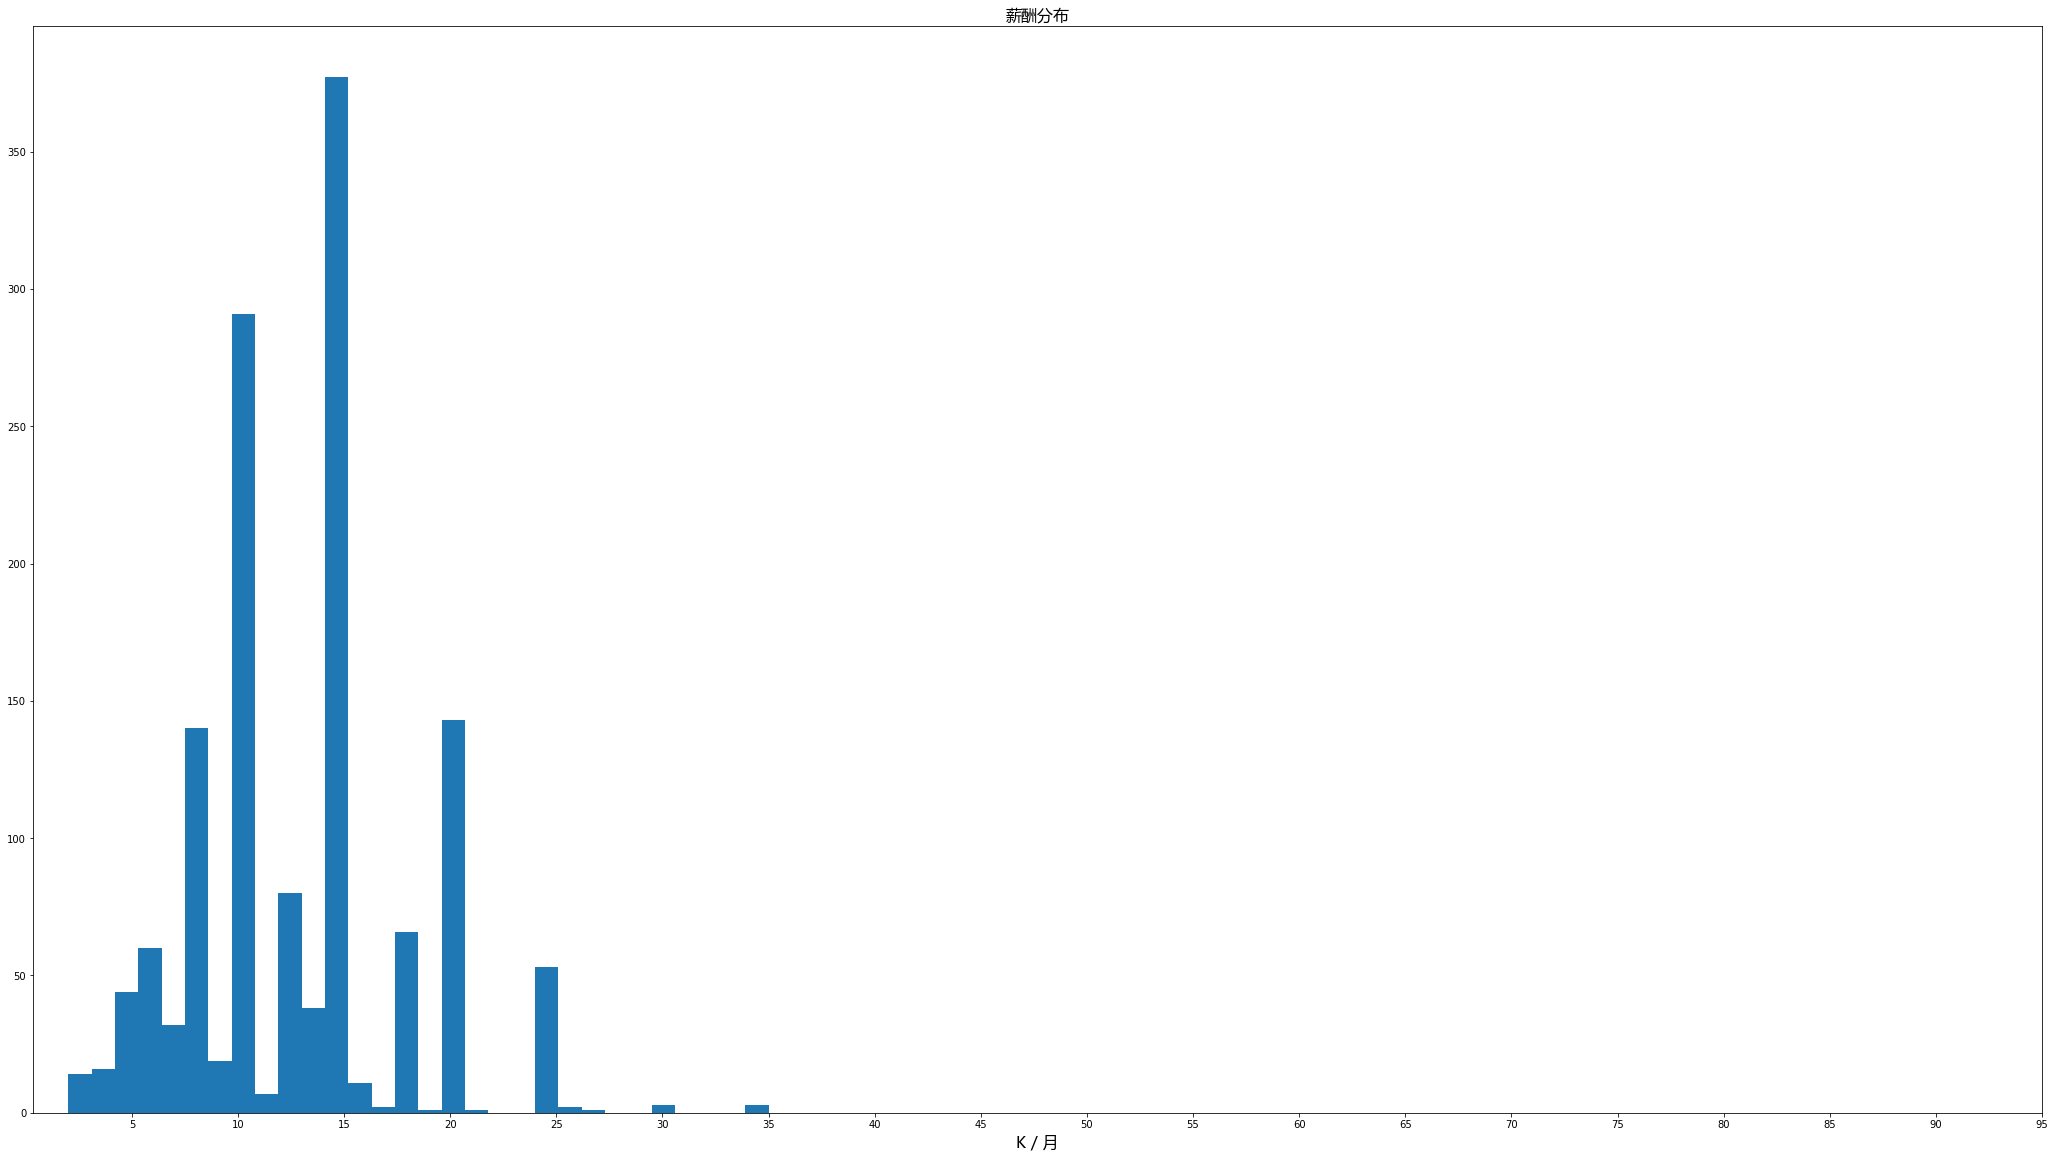

In [41]:
# 查看薪酬分布
fig = pyplot.figure(figsize=(36, 20))
ax2 = pyplot.subplot(111)
rect = ax2.hist(new_df['min_salary'], bins = 30)
ax2.set_title(u'薪酬分布', fontproperties = zhfont)
ax2.set_xlabel(u'K / 月', fontproperties = zhfont)
pyplot.xticks(range(5,100,5))
pyplot.savefig('min_salary.png')
pyplot.show()

## 不同城市薪酬分布

In [33]:
city_count_salary = new_df.groupby(['city'])['min_salary']
data_by7city = city_count[0:7]

In [37]:
data_by7city_df = []
for group in data_by7city.index:
    v = city_count_salary.get_group(group).values
    data_by7city_df.append(v)
data_by7city_df

[array([ 15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
         15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
         15.,  25.,  10.,  20.,  12.,  12.,  13.,  15.,  10.,  20.,  20.,
         25.,  20.,  18.,  15.,  10.,   8.,  20.,  10.,  10.,  10.,  13.,
         15.,  25.,  18.,  19.,  25.,  25.,  15.,  15.,   8.,  15.,   8.,
         15.,  10.,  10.,  10.,  20.,  20.,  20.,  12.,  10.,  10.,  15.,
         15.,  15.,  15.,  20.,  15.,  15.,  15.,  10.,  20.,  18.,   5.,
         15.,  12.,  10.,  15.,  16.,  20.,  15.,  12.,  10.,  15.,  12.,
         15.,  10.,   7.,  15.,  30.,  20.,  15.,  20.,  15.,  15.,   8.,
         12.,  10.,  20.,   6.,   6.,  25.,  15.,  13.,  20.,  18.,  12.,
         13.,  15.,  20.,  15.,   6.,   6.,   8.,  20.,  20.,  20.,  25.,
         15.,  10.,  25.,  18.,  15.,   5.,   8.,  15.,  18.,   8.,  10.,
         10.,  20.,  15.,  10.,  10.,  15.,  15.,  25.,  20.,  10.,  15.,
         15.,  18.,   5.,  10.,  15., 

In [36]:
data_by7city.index

Index([u'北京', u'上海', u'深圳', u'杭州', u'广州', u'成都', u'武汉'], dtype='object')

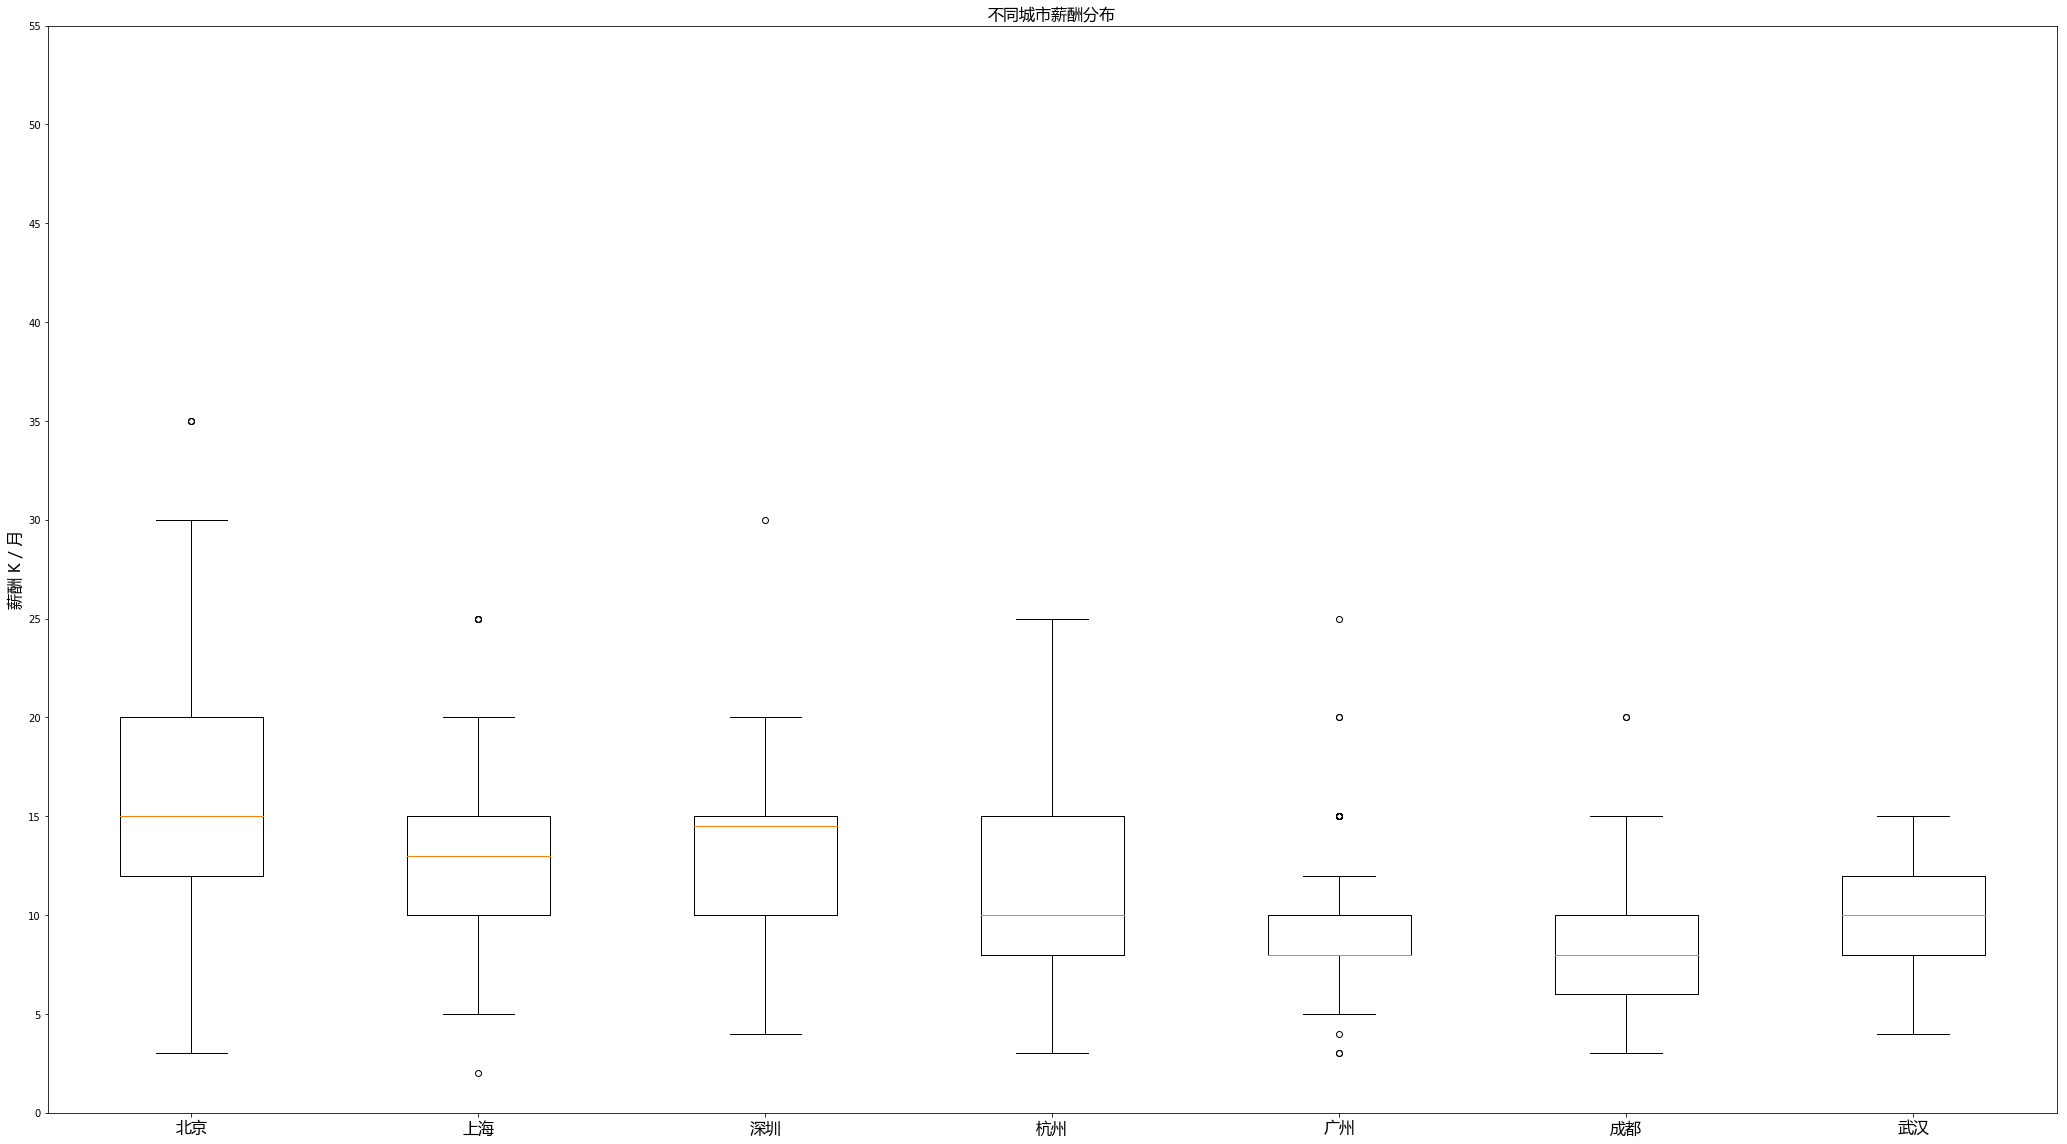

In [42]:
# 查看不同城市薪酬分布
fig = pyplot.figure(figsize=(36,20))
ax3 = pyplot.subplot(111)
rect = ax3.boxplot(data_by7city_df)

ax3.set_xticklabels(data_by7city.index, fontproperties = zhfont)
pyplot.yticks(range(0,60,5))

ax3.set_title(u'不同城市薪酬分布', fontproperties = zhfont)
ax3.set_ylabel(u'薪酬 K / 月', fontproperties = zhfont)

pyplot.savefig('data_by7city_min_salary.png')
pyplot.show()

各地的薪酬相差无几，较高的在北京、深圳、上海，成都、广州稍低。。。为什么我的箱型图上会有圈圈呢？

## 工作经验分布

In [44]:
def JingYan_split(jingyan):
    return jingyan.split(' ')[0]  #return experience

In [45]:
new_df['JingYan'] = new_df.JingYan.apply(JingYan_split)

In [46]:
# 将“经验不限”和“应届毕业生”等同于工作经验1年以下
for i in range(len(new_df['JingYan'])):
    #print new_df['JingYan'].iloc[i]
    if new_df['JingYan'].iloc[i] in [u'经验不限', u'经验应届毕业生', u'经验1年以下']:
        new_df['JingYan'].iloc[i] = u'经验1年以下'

In [47]:
JingYan_count = new_df.groupby(['JingYan'])['positionName'].count()

In [48]:
value_by_exp = pandas.DataFrame([JingYan_count.index, JingYan_count.values]).T
value_by_exp.columns = ['exp', 'count']

In [49]:
sort_by_exp = value_by_exp.copy()

In [51]:
sort_by_exp['sortby'] = pandas.Series([2,1,3,4])

In [52]:
sort_by_exp.sort_values('sortby', inplace=True)

In [53]:
sort_by_exp

,exp,count,sortby
1,经验1年以下,178,1
0,经验1-3年,579,2
2,经验3-5年,574,3
3,经验5-10年,73,4


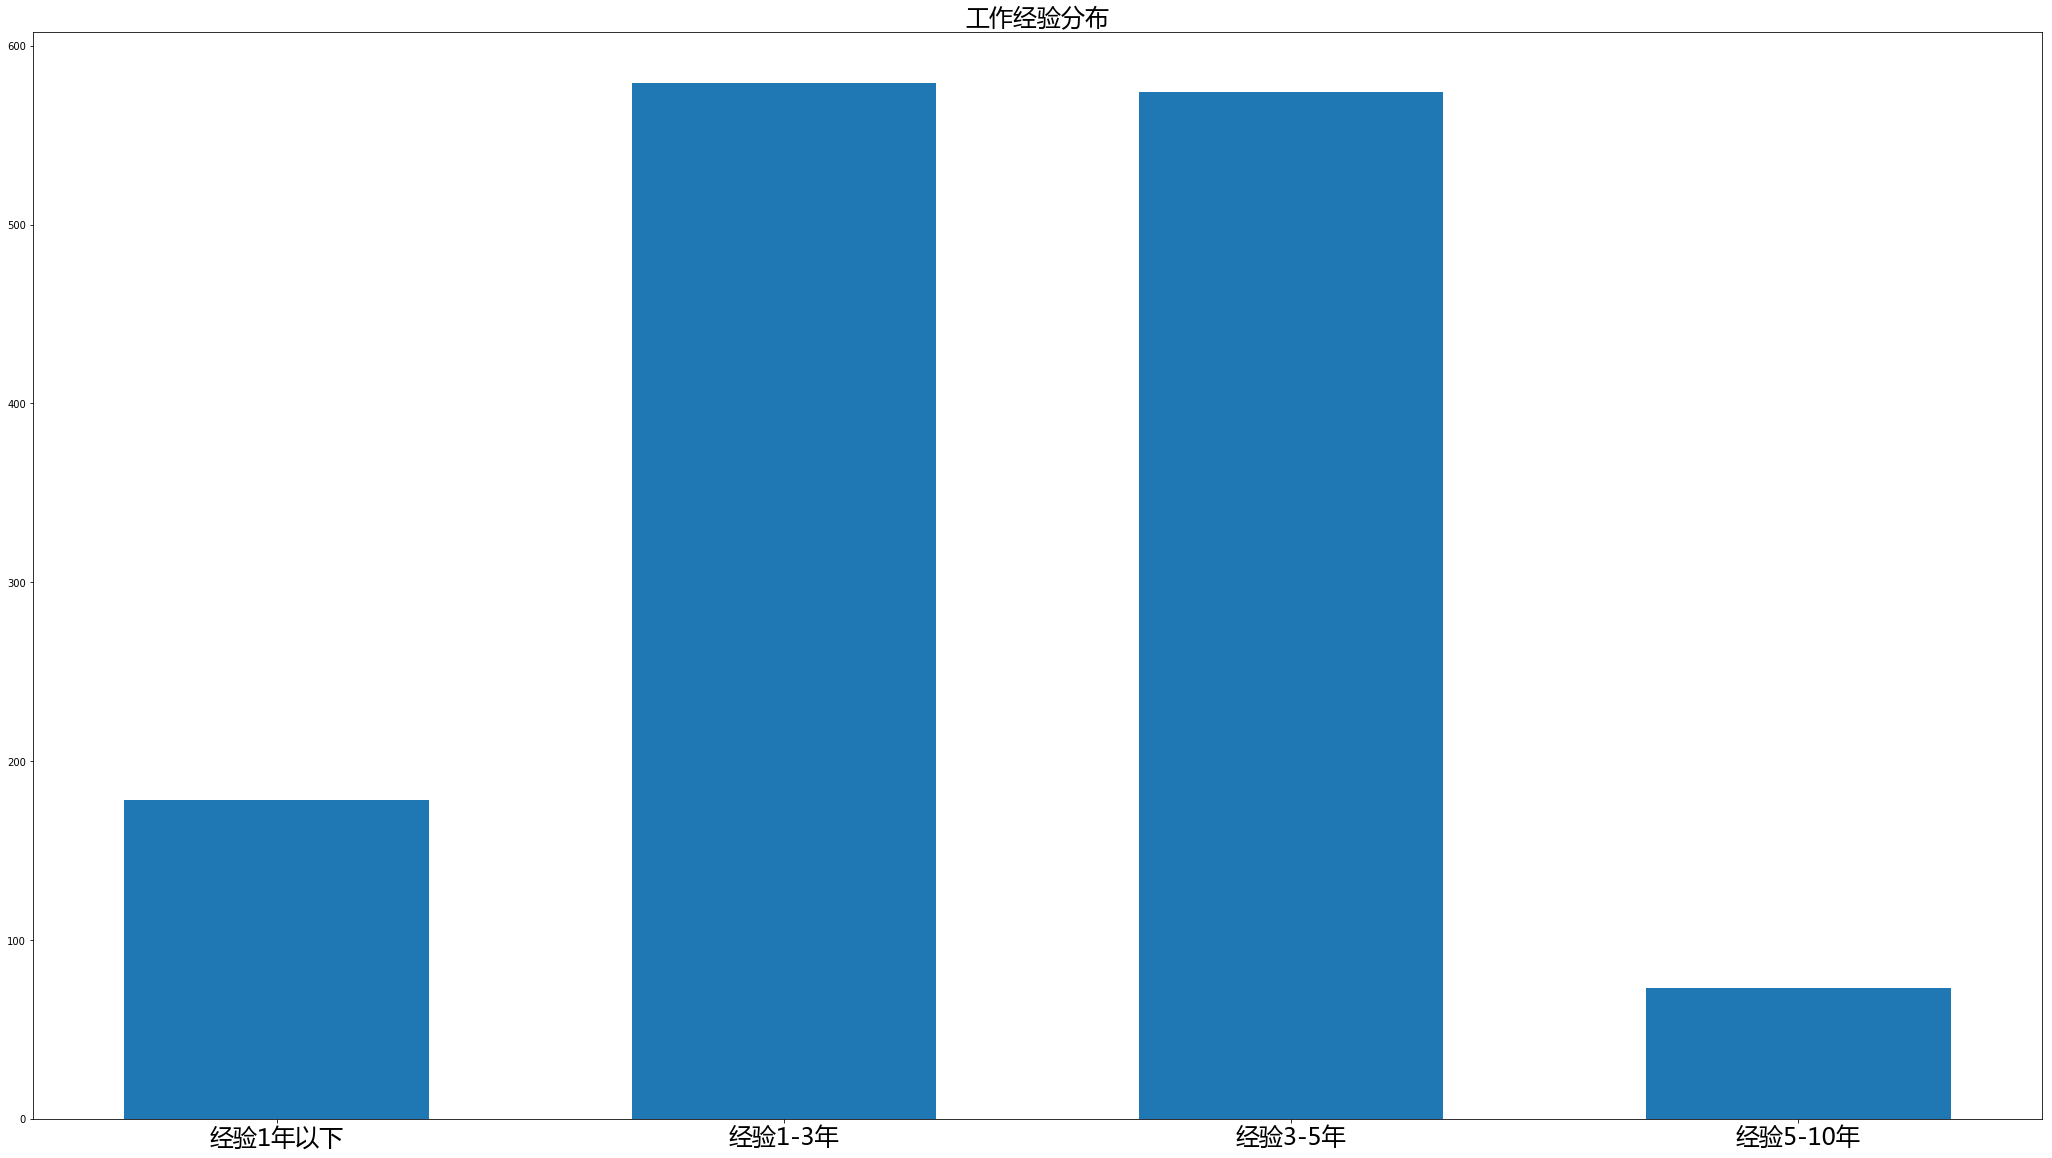

In [57]:
# 绘制经验条形图
fig = pyplot.figure(figsize=(36,20))
ax4 = pyplot.subplot(111)
rect = ax4.bar(numpy.arange(len(sort_by_exp)), sort_by_exp['count'], width=0.6)

auto_xtricks(rect, sort_by_exp.index)
ax4.set_xticklabels(sort_by_exp['exp'], fontproperties = zhfont)
ax4.set_title(u'工作经验分布', fontproperties = zhfont)
pyplot.savefig('JingYan.png')
pyplot.show()

python语言开发的工作经验需求集中在1-3年；python语言目前较为年轻，国内引进较晚，暂时没有出现10年以上工作经验需求。。。呃。。。？

## 不同工作经验薪酬分布

In [58]:
salary_group_by_exp = new_df.groupby(['JingYan'])['min_salary']

In [59]:
salary_group_by_exp_df = []
for group in sort_by_exp['exp']:
    v = salary_group_by_exp.get_group(group).values
    salary_group_by_exp_df.append(v)
salary_group_by_exp_df

[array([ 15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
         15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,   2.,  18.,
         10.,   5.,  18.,   8.,  15.,  12.,  10.,  20.,   8.,  20.,   6.,
          4.,   8.,  10.,   8.,   6.,  10.,   4.,  15.,   3.,   7.,   6.,
         20.,  10.,   4.,   4.,   8.,  10.,  18.,   5.,  10.,   5.,   7.,
         20.,   8.,  20.,  15.,   5.,  12.,  13.,  10.,   8.,  15.,   5.,
          8.,   7.,  10.,   8.,  20.,  10.,   4.,   8.,   3.,   4.,   8.,
          5.,   6.,  10.,  18.,   8.,   5.,   3.,   8.,   3.,   8.,   4.,
         20.,  20.,   9.,  15.,   8.,   3.,  13.,  10.,  15.,  12.,   5.,
         25.,   8.,   9.,   8.,  15.,  15.,   6.,  12.,  10.,   7.,  15.,
          5.,   3.,  10.,   7.,   4.,  10.,   2.,  15.,  14.,  15.,  10.,
          3.,  20.,   8.,   8.,   5.,  10.,  15.,   4.,  10.,  16.,  11.,
         10.,  10.,   3.,  15.,   5.,  12.,   8.,  15.,  10.,  15.,  10.,
         10.,   6.,  10.,  10.,  20., 

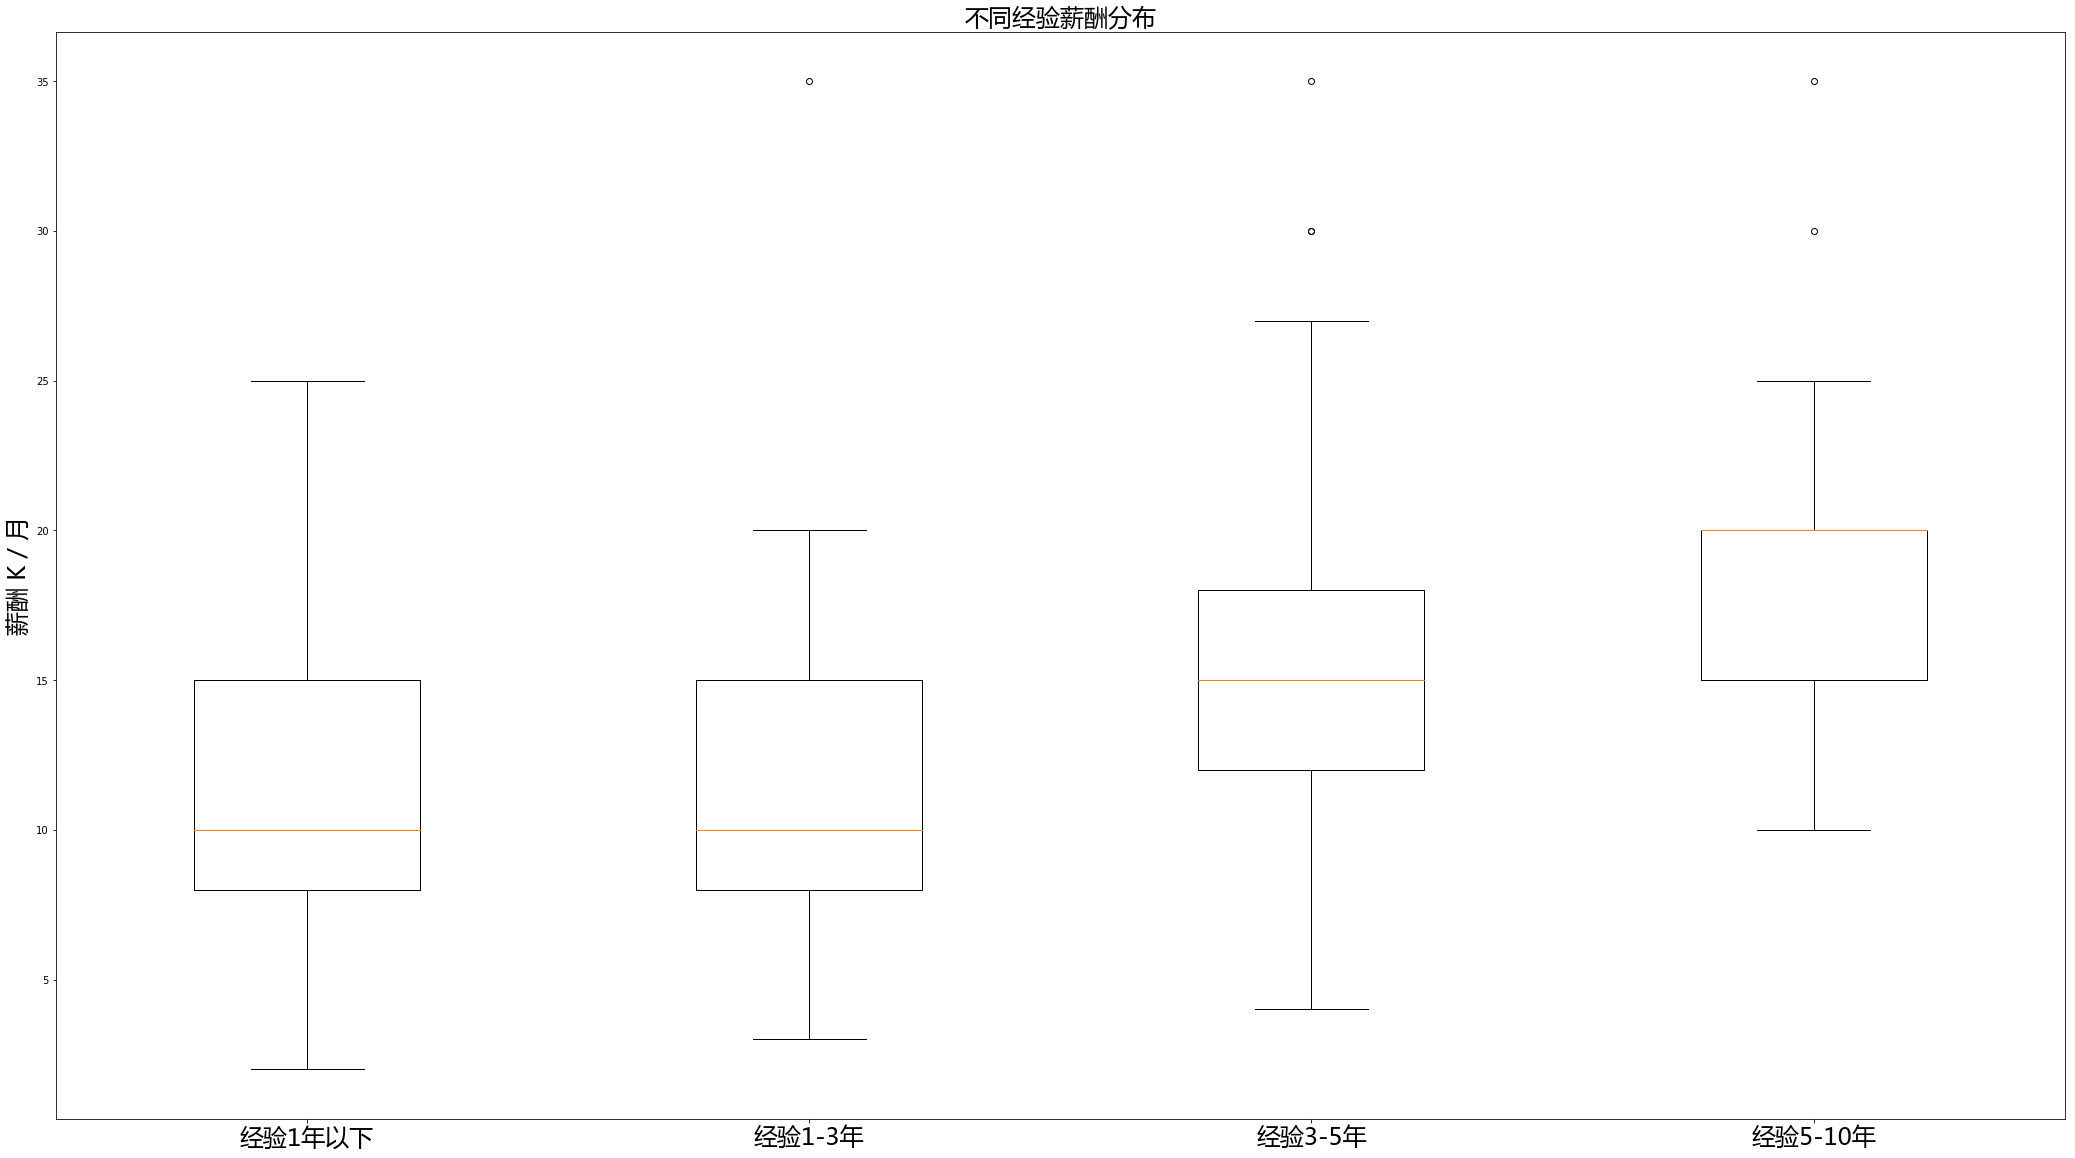

In [61]:
fig = pyplot.figure(figsize=(36,20))
ax5 = pyplot.subplot(111)
rect = ax5.boxplot(salary_group_by_exp_df)

ax5.set_xticklabels(sort_by_exp['exp'], fontproperties = zhfont)
ax5.set_title(u'不同经验薪酬分布', fontproperties = zhfont)
ax5.set_ylabel(u'薪酬 K / 月', fontproperties = zhfont)

pyplot.savefig('salary_by_JingYan.png')
pyplot.show()

薪酬随经验上升而上升

## 职业技能关键词

In [64]:
import jieba.analyse

In [62]:
def key_words(text):
#     while re.findall('&nbsp;', text, re.S):
#         restr = re.findall('&nbsp;', text, re.S)
#         for i in range(len(restr)):
#             restri = text.replace(restr[i][1], '', 1)
        #print text
    key_words = jieba.analyse.extract_tags(text, topK=20, withWeight=False, allowPOS=())
    return key_words

In [65]:
new_df['key_words'] = new_df['destription'].apply(key_words)

In [68]:
def write_to_txt(word_list):
    f = open('word_list_txt.txt', 'a')
    for word in word_list:
        f.writelines((word+u',').encode('utf-8'))
    f.close()

In [70]:
new_df['key_words'].apply(write_to_txt)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1375    None
1376    None
1377    None
1378    None
1379    None
1380    None
1381    None
1382    None
1383    None
1384    None
1385    None
1386    None
1387    None
1388    None
1389    None
1390    None
1391    None
1392    None
1393    None
1394    None
1395    None
1396    None
1397    None
1398    None
1399    None
1400    None
1401    None
1402    None
1403    None
1404    None
Name: key_words, Length: 1404, dtype: object

In [72]:
words_text = unicode(open('word_list_txt.txt', 'r').read(),  encoding='utf-8')

Populating the interactive namespace from numpy and matplotlib


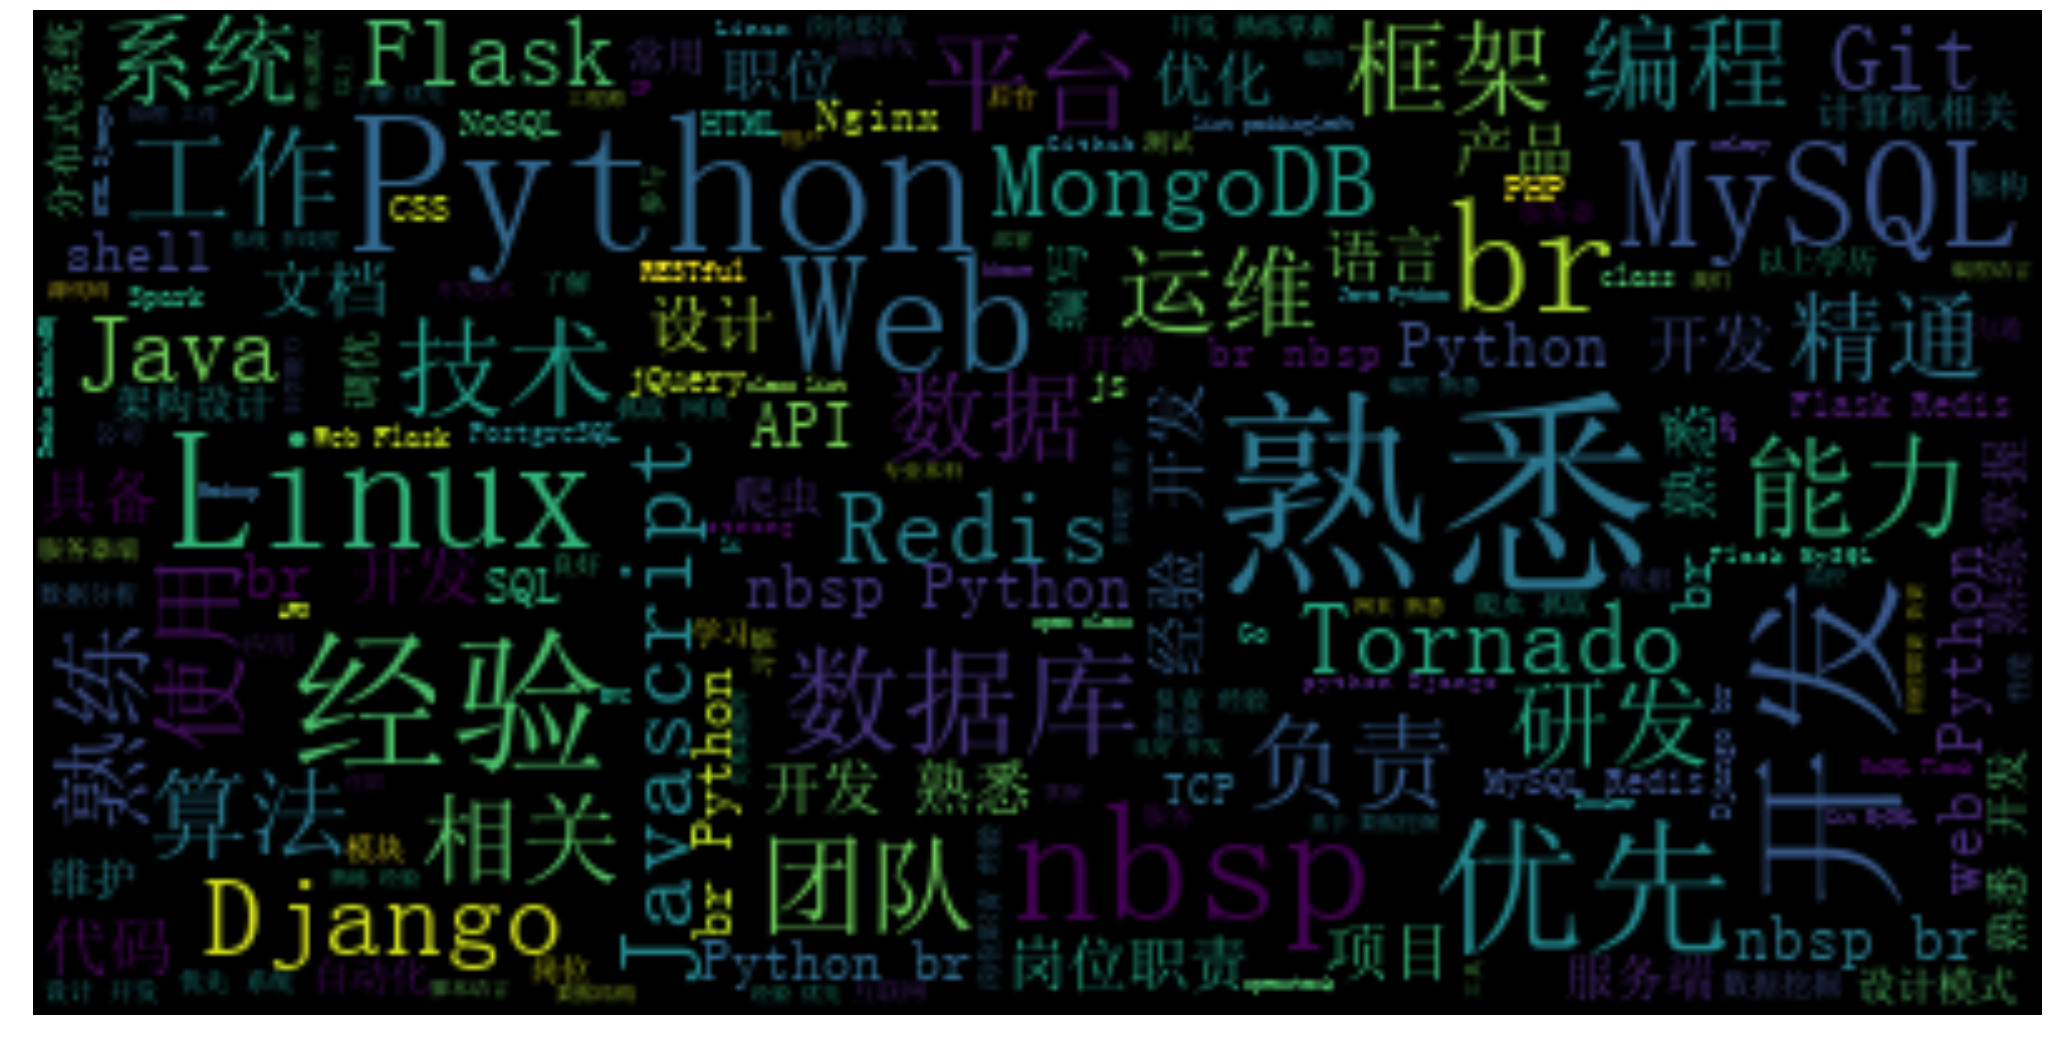

In [77]:
wordcloud = WordCloud(font_path="D:\Projects\Spider\simsun.ttf").generate(words_text)
%pylab inline

fig = pyplot.figure(figsize=(36,20))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")
pyplot.show()

wordcloud.to_file('wordcloud.png')

需要忽略“nbsp”和“br”（数据没清洗干净。。。）